In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
!pip install torch

In [ ]:
!pip install torchvision

In [ ]:
dataset=MNIST(root='data/',download=True)
len(dataset)

60000

In [ ]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

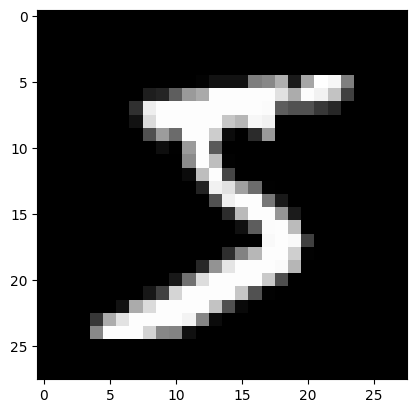

label is: 5


In [ ]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
plt.show()
print("label is:",label)

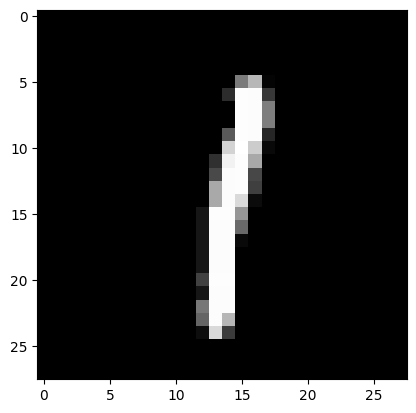

In [ ]:
import random
dx=random.randint(0,len(dataset))
image,label=dataset[dx]
plt.imshow(image,cmap='gray')
plt.show()


In [ ]:
import torchvision.transforms as transforms

In [ ]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor,label=dataset[0]
print(img_tensor.shape)#1-> color channel 28->height 28->width of image

torch.Size([1, 28, 28])


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.min(img_tensor),torch.max(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(0.) tensor(1.)


In [ ]:
img_tensor.shape

torch.Size([1, 28, 28])

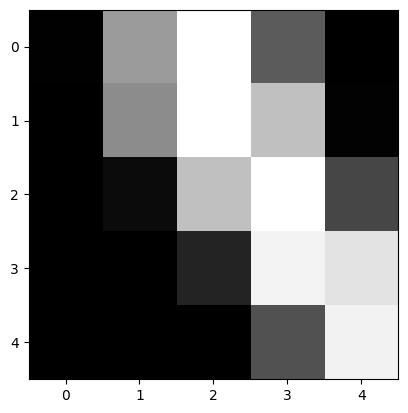

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [ ]:
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True)
val_dl=DataLoader(val_ds,batch_size)

In [ ]:
import torch.nn as nn

In [ ]:
input_size=28*28
num_classes=10
model=nn.Linear(input_size, num_classes)


In [ ]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
for images, labels in train_dl:
    print(label)
    print(images.shape)
    images=images.reshape(128,784)
    outputs=model(images)

5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.Size([128, 1, 28, 28])
5
torch.

RuntimeError: shape '[128, 784]' is invalid for input of size 62720

In [ ]:
images.reshape(128,784).shape

RuntimeError: shape '[128, 784]' is invalid for input of size 62720

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,xa):
        xa=xa.reshape(-1,784)
        out=self.linear(xa)
        return out
model=MnistModel()
model.linear
#constructor function defines the layers. In the forward function
#preprocessing like reshaping is done and passed through layers



Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [ ]:
for images,label in train_dl:
    print(images.shape)
    outputs=model(images)
    break
print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([[-0.0102, -0.4353, -0.0321, -0.2391, -0.2240, -0.2864, -0.1059, -0.6812,
         -0.1694,  0.3055],
        [-0.0424, -0.2690, -0.2344,  0.1672, -0.0810,  0.1304,  0.1596, -0.2027,
         -0.1055,  0.2218]])


In [ ]:
import torch.nn.functional as F

In [ ]:
probs=F.softmax(outputs, dim=1)

In [ ]:
print(probs[:1].data)

tensor([[0.1158, 0.0757, 0.1133, 0.0921, 0.0935, 0.0878, 0.1052, 0.0592, 0.0987,
         0.1587]])


In [ ]:
print(torch.sum(probs[:1]))

tensor(1.0000, grad_fn=<SumBackward0>)


In [ ]:
max_probs,preds=torch.max(probs,dim=1)
print(max_probs)
print(preds)

tensor([0.1587, 0.1262, 0.1474, 0.1311, 0.1811, 0.1918, 0.1575, 0.1400, 0.2075,
        0.1253, 0.1239, 0.1248, 0.1269, 0.1277, 0.1197, 0.1732, 0.1260, 0.1575,
        0.1258, 0.1296, 0.1246, 0.1260, 0.1438, 0.1377, 0.1174, 0.1377, 0.1426,
        0.1173, 0.1212, 0.1374, 0.1640, 0.1348, 0.1385, 0.1310, 0.1365, 0.1275,
        0.1212, 0.1462, 0.1455, 0.1369, 0.1840, 0.1659, 0.1276, 0.1401, 0.1240,
        0.1410, 0.1634, 0.1217, 0.1174, 0.1186, 0.1703, 0.1360, 0.1524, 0.1225,
        0.1669, 0.1476, 0.1351, 0.1721, 0.1237, 0.1126, 0.1556, 0.1730, 0.1455,
        0.1125, 0.1377, 0.1394, 0.1241, 0.1504, 0.1151, 0.1118, 0.1318, 0.1231,
        0.1353, 0.1423, 0.1383, 0.1267, 0.1174, 0.1355, 0.1656, 0.1218, 0.1294,
        0.1431, 0.1397, 0.1157, 0.1228, 0.2548, 0.1535, 0.1577, 0.1634, 0.1740,
        0.1428, 0.1252, 0.1334, 0.1220, 0.1451, 0.1389, 0.1632, 0.1265, 0.1478,
        0.1322, 0.1719, 0.1200, 0.1497, 0.1115, 0.1320, 0.1348, 0.1260, 0.1293,
        0.1464, 0.1186, 0.1357, 0.1247, 

In [ ]:
print(label)

tensor([0, 1, 6, 9, 2, 3, 3, 6, 0, 2, 7, 6, 1, 0, 6, 5, 1, 6, 4, 4, 2, 1, 0, 1,
        9, 0, 8, 4, 5, 0, 3, 1, 8, 0, 9, 3, 1, 4, 1, 8, 3, 7, 5, 6, 4, 8, 8, 5,
        1, 6, 5, 0, 1, 4, 3, 8, 3, 0, 0, 6, 1, 3, 8, 6, 5, 1, 9, 0, 7, 6, 3, 4,
        1, 9, 3, 4, 7, 1, 3, 7, 7, 0, 2, 1, 5, 3, 0, 5, 2, 3, 2, 2, 6, 5, 1, 2,
        8, 9, 1, 0, 8, 4, 2, 2, 6, 9, 5, 9, 5, 5, 0, 6, 0, 9, 2, 0, 1, 5, 3, 0,
        3, 5, 5, 5, 3, 6, 2, 6])


In [ ]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(labels==preds).item()/len(preds))

In [ ]:
accuracy(outputs,label)

tensor(0.0703)

Cross entropy is the loss function used for clasification problems

In [ ]:
accuracy.backward()
'''accuracy is not a loss function this is beacause if a model predicts
wrong and crt label is 5 the model probs is 0.2 another model is mrong but has probs 0,5> however both models are wrong
but model 2 is certainly better than model 1 Acucuracy doesn't take this into account'''

AttributeError: 'function' object has no attribute 'backward'

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn=F.cross_entropy

In [ ]:
loss=loss_fn(outputs,label)
print(loss)

tensor(2.3173, grad_fn=<NllLossBackward0>)


So forward pass means computing prediction after feeding it to model. Then we compute loss using cross_entropy and we compute the weights and bias gradients wrt to loss. Using optimization tools like here SGD we updated the values of weight by subtracting it from gradients of loss wrt weights and bias.
examples of optimization functions are SGD,Adam

What are hyperparameters. They are which that can be controlled by the programmer like learning rate, Batchsize,
no of epochs, optimization function, Activation function
choosing appropriate hyperparameters is imp for accuracy

What are activation functions--they introduce non-linearity in model so that
model can learn from complex patterns example sigmoid for binary data
RELU

In [ ]:
def fit(epochs,lr,model,train_dl,val_dl):
    history=[]
    opt=torch.optim.SGD(model.parameters(),lr)
    for epoch in range(epochs):
        for batch in train_dl:
            loss=model.training_step(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
    #validation phase
        result=evaluate(model,val_dl)
        model.epoch_end(epoch,result)
        history.append(result)
    return history

In [ ]:
def evaluate(model, val_dl):
    output=[model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch_end(output)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
    def training_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=loss_fn(out,labels)
        return loss
    def validation_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=loss_fn(out,labels)
        acc=accuracy(out,labels)
        return {'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self,output):
        batch_loss=[x['val_loss'] for x in output]
        epoch_loss=torch.stack(batch_loss).mean()
        batch_acc=[x['val_acc'] for x in output]
        epoch_acc=torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss:{:.4f}, val_acc:{:.4f}".format(epoch,result['val_loss'],result['val_acc']))
model=MnistModel()

In [ ]:
result0=evaluate(model, val_dl)
result0

{'val_loss': 2.3112761974334717, 'val_acc': 0.11540743708610535}

In [ ]:
history1=fit(3,0.001,model,train_dl,val_dl)
print(history1)

Epoch [0], val_loss:1.9335, val_acc:0.6372
Epoch [1], val_loss:1.6628, val_acc:0.7349
Epoch [2], val_loss:1.4617, val_acc:0.7724
[{'val_loss': 1.9334673881530762, 'val_acc': 0.6371637582778931}, {'val_loss': 1.6627564430236816, 'val_acc': 0.7348694801330566}, {'val_loss': 1.4616894721984863, 'val_acc': 0.7724485993385315}]


In [ ]:
history2=fit(5,0.001,model,train_dl,val_dl)


Epoch [0], val_loss:1.3101, val_acc:0.7920
Epoch [1], val_loss:1.1937, val_acc:0.8043
Epoch [2], val_loss:1.1024, val_acc:0.8142
Epoch [3], val_loss:1.0291, val_acc:0.8207
Epoch [4], val_loss:0.9692, val_acc:0.8260


In [ ]:
history3=fit(5,0.001,model,train_dl,val_dl)


Epoch [0], val_loss:0.9193, val_acc:0.8310
Epoch [1], val_loss:0.8773, val_acc:0.8354
Epoch [2], val_loss:0.8412, val_acc:0.8387
Epoch [3], val_loss:0.8100, val_acc:0.8407
Epoch [4], val_loss:0.7827, val_acc:0.8439


In [ ]:
history4=fit(5,0.001,model,train_dl,val_dl)


Epoch [0], val_loss:0.7585, val_acc:0.8473
Epoch [1], val_loss:0.7371, val_acc:0.8501
Epoch [2], val_loss:0.7178, val_acc:0.8524
Epoch [3], val_loss:0.7005, val_acc:0.8535
Epoch [4], val_loss:0.6847, val_acc:0.8554


In [ ]:
print(history4)

[{'val_loss': 0.7585384249687195, 'val_acc': 0.8473101258277893}, {'val_loss': 0.737051784992218, 'val_acc': 0.8500791192054749}, {'val_loss': 0.7177978157997131, 'val_acc': 0.8523536324501038}, {'val_loss': 0.7004569172859192, 'val_acc': 0.8535403609275818}, {'val_loss': 0.6847367882728577, 'val_acc': 0.8554192781448364}]


Text(0.5, 1.0, 'Accuracy vs no of epochs')

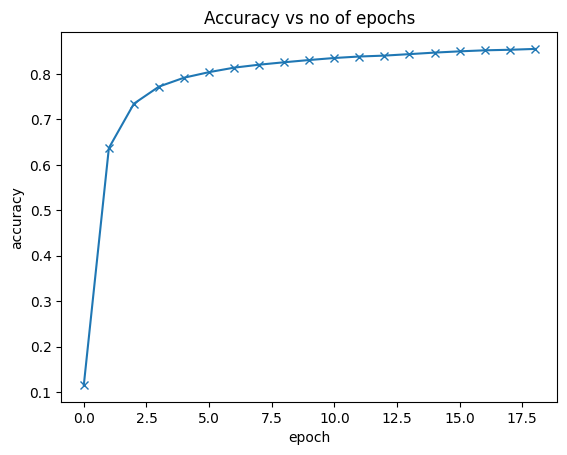

In [ ]:
history=[result0]+history1+history2+history3+history4
accuracies=[result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs no of epochs')

In [ ]:
test_ds=MNIST(root='data/',train=False,transform=transforms.ToTensor())

In [ ]:
batch_size=256
test_dl=DataLoader(test_ds,batch_size)
result=evaluate(model,test_dl)
result

#if testset accuracy is very low compared to that of validation set bad v
#validation set bcs test set represents real world and validation should be closer to real

{'val_loss': 0.6650567054748535, 'val_acc': 0.8570312261581421}

In [ ]:
!pip install jovian --upgrade --quiet63524\

In [ ]:
import jovian

In [ ]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_acc'])


[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ··········
[jovian] Metrics logged.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
jovian.commit(project='03-logistic-regression',environment=None)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


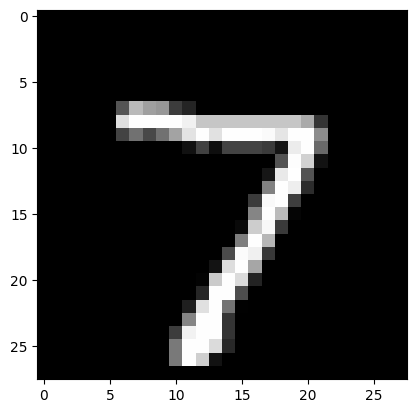

torch.Size([1, 28, 28])
7


In [ ]:
img,label=test_ds[0]
plt.imshow(img[0],cmap='gray')
plt.show()
print(img.shape)
print(label)


In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_img(img,model):
    xb=img.reshape(-1,784)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()#extracts number from the tensor

In [ ]:
img,label=test_ds[0]
plt.imshow(img[0],cmap='gray')
plt.show()
print("Label is",label)
predict_img(img,model)

In [ ]:
img,label=test_ds[100]
plt.imshow(img[0],cmap='gray')
plt.show()
print("Label is",label)
predict_img(img,model)

In [ ]:
img,label=test_ds[999]
plt.imshow(img[0],cmap='gray')
plt.show()
print("Label is",label)
predict_img(img,model)

In [ ]:
img,label=test_ds[3000]
plt.imshow(img[0],cmap='gray')
plt.show()
print("Label is",label)
predict_img(img,model)

In [ ]:
len(test_ds)

Saving and loading the model


In [ ]:
torch.save(model.state_dict,'mnist-logistic.pth')

In [ ]:
model.state_dict().keys()

odict_keys(['linear.weight', 'linear.bias'])

In [ ]:
model2=MnistModel()

In [ ]:
model2.state_dict().keys()

odict_keys(['linear.weight', 'linear.bias'])

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))


TypeError: Expected state_dict to be dict-like, got <class 'method'>.

In [ ]:
evaluate(model2,test_dl)

{'val_loss': 2.341637134552002, 'val_acc': 0.05644531175494194}

In [ ]:
model2.state_dict()

TypeError: Expected state_dict to be dict-like, got <class 'method'>.

In [ ]:
jovian.commit(project='03-logistic-regression',environment=None,outputs=['mnist-logistic.pth'])

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [3]:
!git clone https://github.com/vv0935/Working-with-MNIST-dataset.git


Cloning into 'Working-with-MNIST-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
!mv https://drive.google.com/drive/folders/1EpLFWdl1RFlWxC9xtYDqiRqmF5fH4XKQ /path/to/cloned/repository/
